About this data
Attribute Information: target or dependent column = (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
import pandas as pd
data  =pd.read_csv('Downloads/mushrooms.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [3]:
data.sample(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7051,e,b,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,y,c,l
5657,p,f,s,g,t,f,f,c,b,w,...,f,w,w,p,w,o,p,h,s,u
221,p,x,s,w,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,g


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
import sys
import os
from src.exception import CustomException
from src.logger import logging
import pandas as pd 
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from dataclasses import dataclass
from src.utils import save_object


In [8]:
categorical_cols = data[['cap-surface', 'bruises', 'gill-spacing', 'gill-size', 'gill-color','stalk-root' ,'stalk-surface-above-ring', 'stalk-surface-below-ring', 'veil-type', 'ring-type', 'spore-print-color', 'population', 'habitat']]

In [9]:
categorical_cols

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,veil-type,ring-type,spore-print-color,population,habitat
0,s,t,c,n,k,e,s,s,p,p,k,s,u
1,s,t,c,b,k,c,s,s,p,p,n,n,g
2,s,t,c,b,n,c,s,s,p,p,n,n,m
3,y,t,c,n,n,e,s,s,p,p,k,s,u
4,s,f,w,b,k,e,s,s,p,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,s,f,c,b,y,?,s,s,p,p,b,c,l
8120,s,f,c,b,y,?,s,s,p,p,b,v,l
8121,s,f,c,b,n,?,s,s,p,p,b,c,l
8122,y,f,c,n,b,?,s,k,p,e,w,v,l


In [10]:
data['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [11]:
for i in data.columns:
    print(i,data[i].unique())
'''here we find values in each column we found stalk-root ['e' 'c' 'b' 'r' '?'] have'?' as nan value so we have to remove
this with np.nan and and we also describe that veil-type ['p'] hase only one value so this have no effect on our target column
so we can drop this column
 '''



class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


"here we find values in each column we found stalk-root ['e' 'c' 'b' 'r' '?'] have'?' as nan value so we have to remove\nthis with np.nan and and we also describe that veil-type ['p'] hase only one value so this have no effect on our target column\nso we can drop this column\n "

In [12]:
for i in data.columns:
    missing = data[i][data[i]=='?'].count()
    if missing != 0:
        print(i, missing)

stalk-root 2480


In [13]:
import numpy as np
data['stalk-root'] = data['stalk-root'].replace('?', np.nan)

In [14]:
data.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [15]:
data['stalk-root'].value_counts()

stalk-root
b    3776
e    1120
c     556
r     192
Name: count, dtype: int64

In [16]:
df = data.copy()
df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [17]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

# Replace missing values with the most frequent value
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)



In [18]:
df_imputed['stalk-root'].value_counts()

stalk-root
b    6256
e    1120
c     556
r     192
Name: count, dtype: int64

<Axes: >

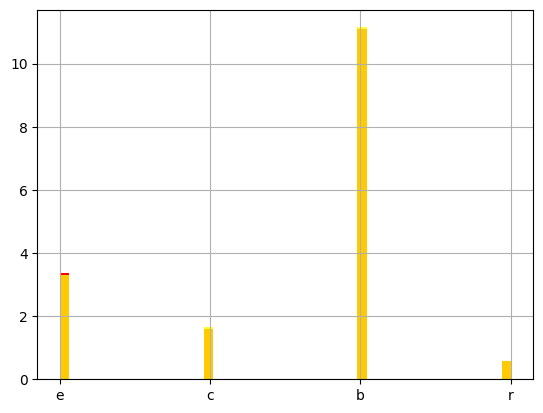

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['stalk-root_na'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
data['stalk-root'].hist(bins=50, ax=ax, color='yellow', density=True, alpha=0.8)

In [19]:
data['stalk-root_na'] = data['stalk-root']
data['stalk-root_na'][data['stalk-root_na'].isnull()] = data['stalk-root'].dropna().sample(data['stalk-root'].isnull().sum()).values


In [20]:
data['stalk-root'].value_counts()

stalk-root
b    3776
e    1120
c     556
r     192
Name: count, dtype: int64

In [21]:
 data['stalk-root'] = data['stalk-root_na']

In [20]:
df_imputed['stalk-root'].value_counts()

stalk-root
b    6256
e    1120
c     556
r     192
Name: count, dtype: int64

In [21]:
data['stalk-root_na'].value_counts()


stalk-root_na
b    5416
e    1639
c     783
r     286
Name: count, dtype: int64

In [24]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [23]:
#data = data.drop(['stalk-root', 'veil-type'], axis=1)
data.describe().T



,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


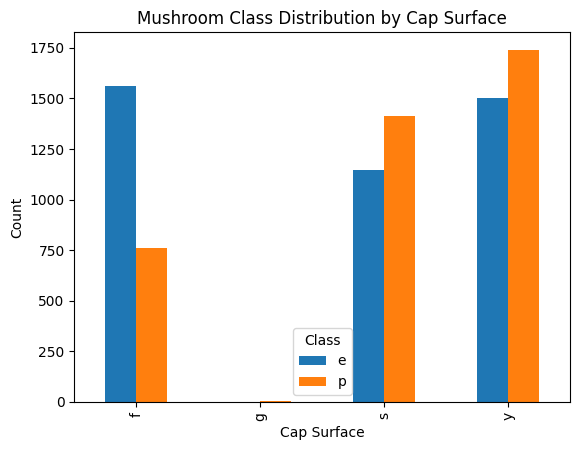

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['cap-surface'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('Cap Surface')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()


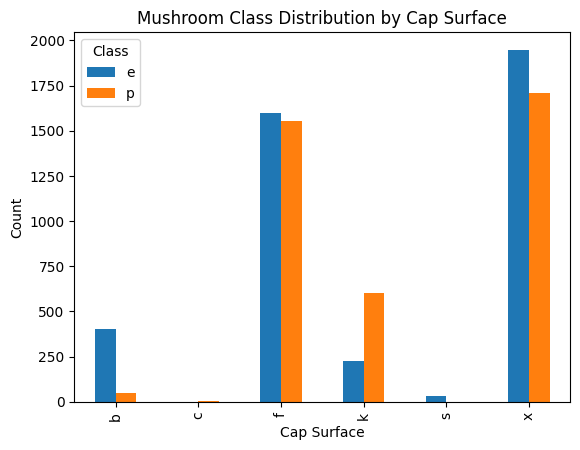

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['cap-shape'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('Cap Surface')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

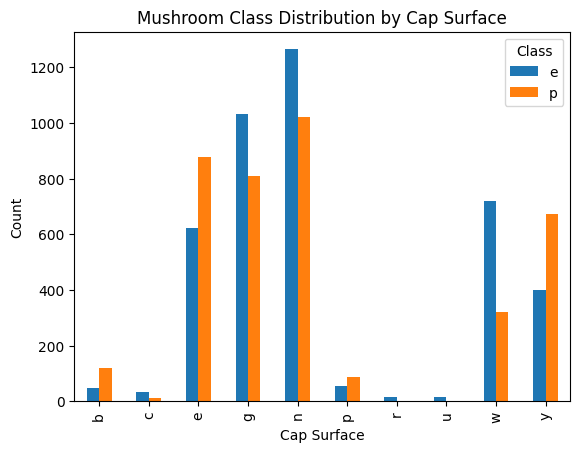

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['cap-color'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('Cap Surface')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

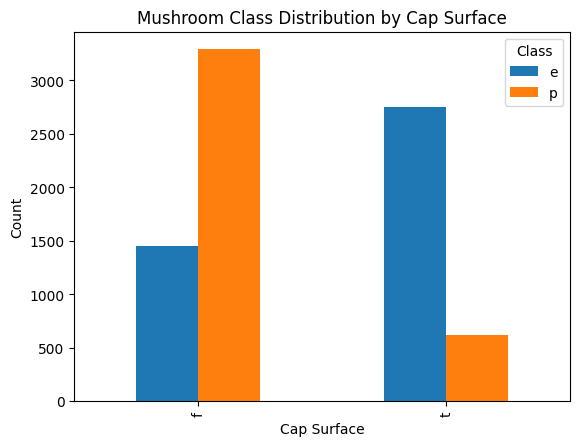

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['bruises'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('Cap Surface')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

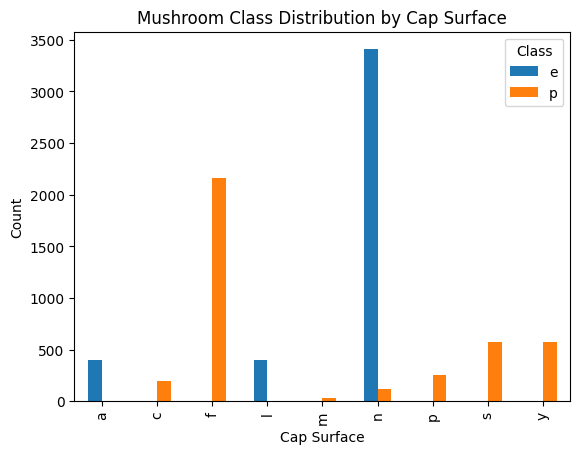

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['odor'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('Cap Surface')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

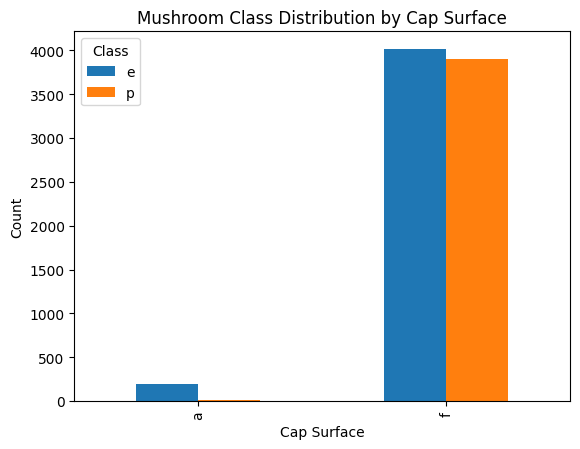

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['gill-attachment'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('Cap Surface')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

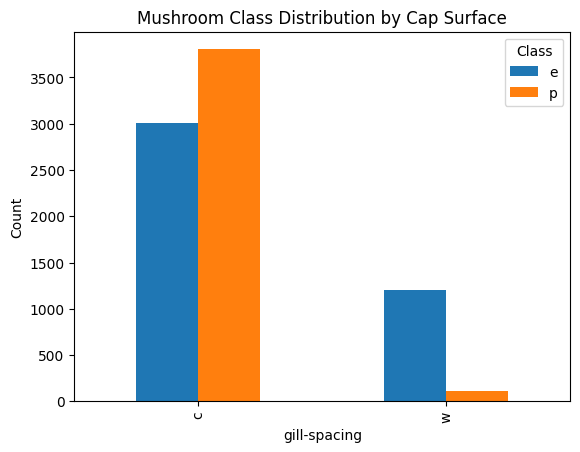

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['gill-spacing'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('gill-spacing')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

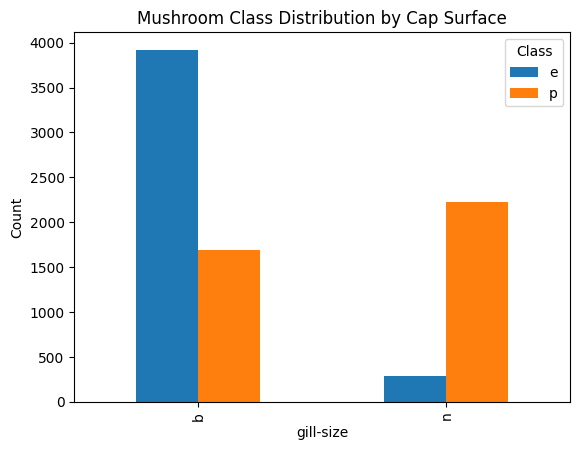

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['gill-size'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('gill-size')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

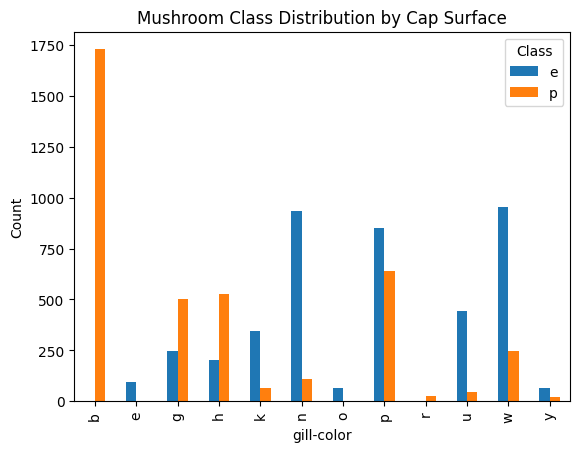

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['gill-color'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('gill-color')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

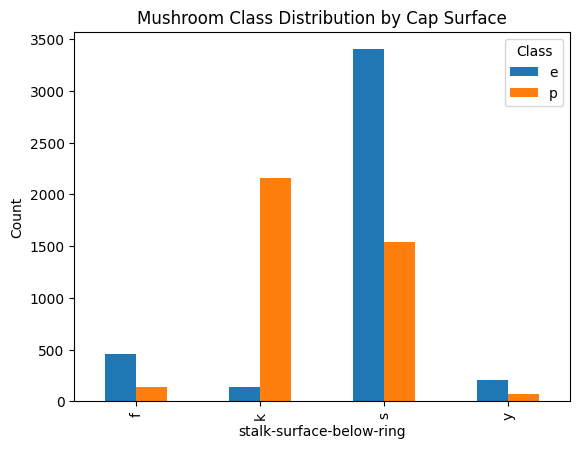

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['stalk-surface-below-ring'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('stalk-surface-below-ring')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

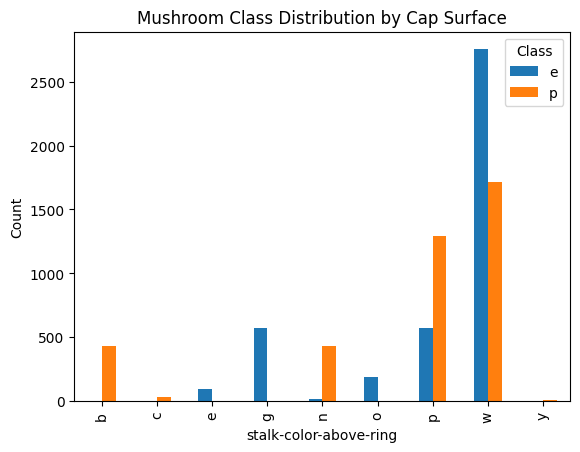

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['stalk-color-above-ring'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('stalk-color-above-ring')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

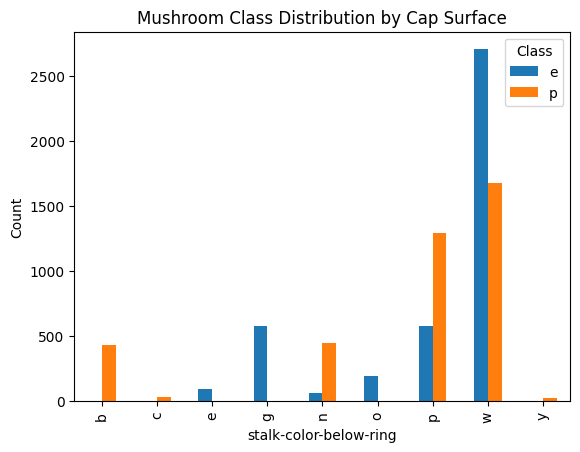

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['stalk-color-below-ring'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('stalk-color-below-ring')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

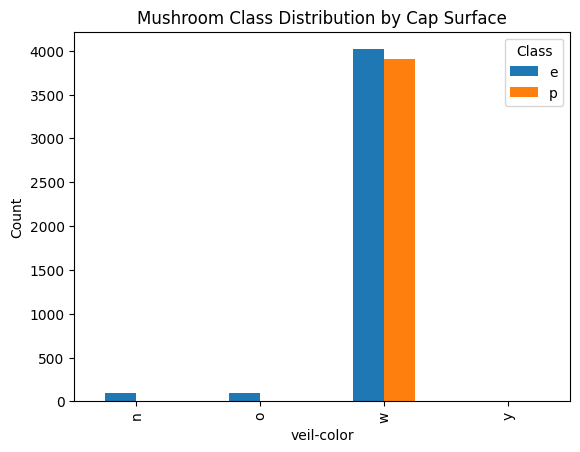

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['veil-color'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('veil-color')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

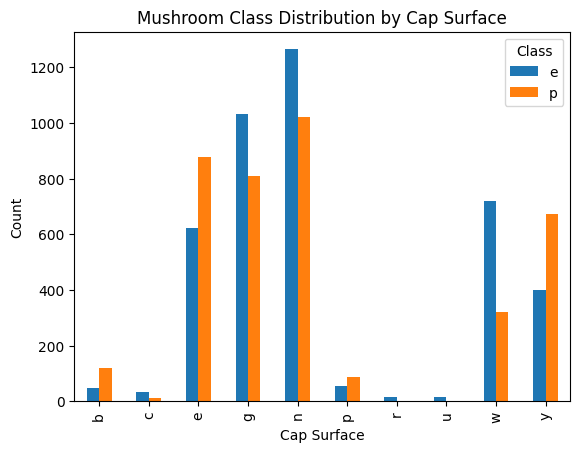

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['cap-color'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('Cap Surface')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

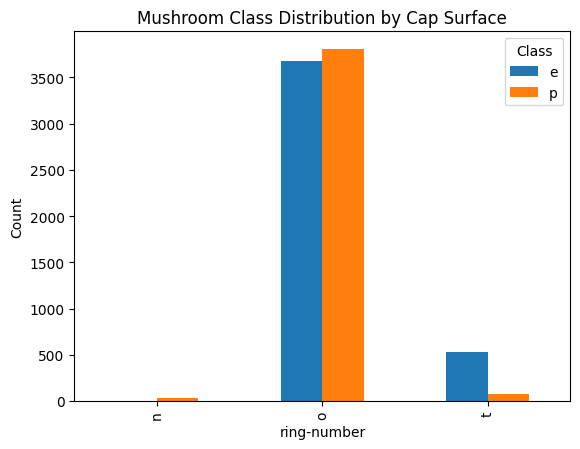

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['ring-number'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('ring-number')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

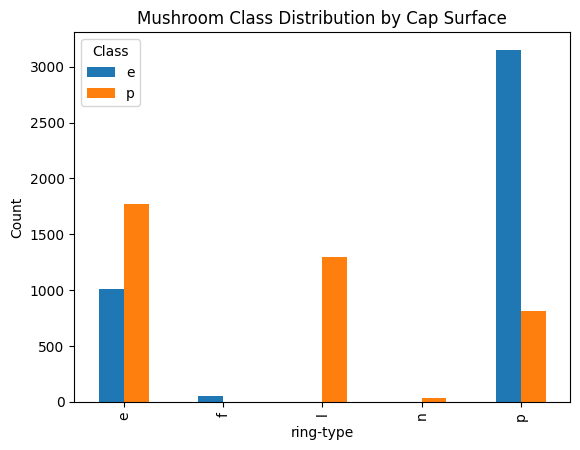

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['ring-type'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('ring-type')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

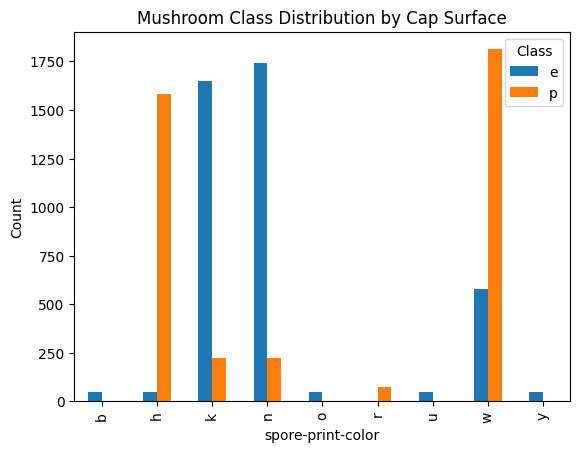

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['spore-print-color'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('spore-print-color')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

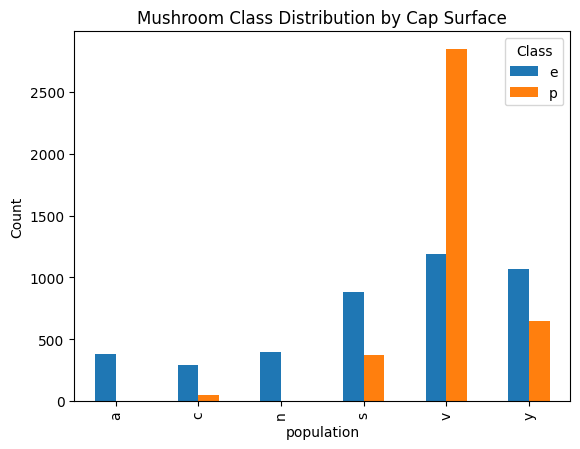

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['population'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('population')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

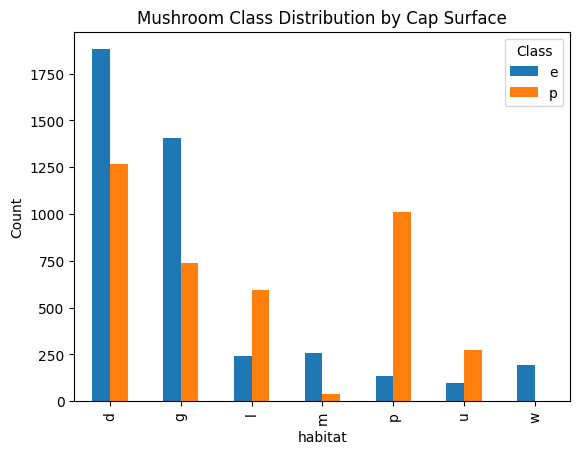

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['habitat'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('habitat')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

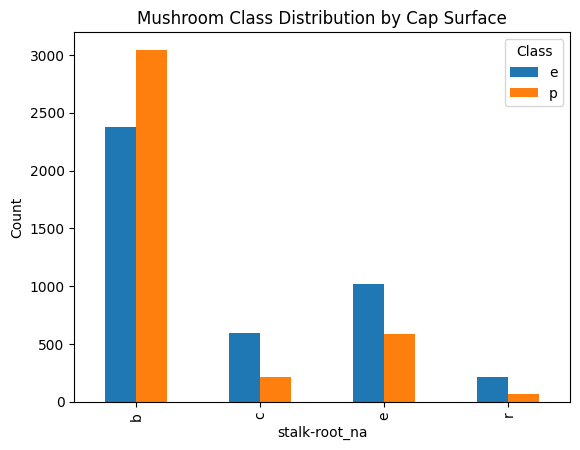

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the grouped value counts
grouped_counts = data.groupby(['stalk-root'])['class'].value_counts().unstack()

# Create the bar chart
grouped_counts.plot.bar()

# Customize the chart
plt.xlabel('stalk-root_na')
plt.ylabel('Count')
plt.title('Mushroom Class Distribution by Cap Surface')
plt.legend(title='Class')

# Show the chart
plt.show()

In [26]:
from scipy.stats import chi2_contingency
import pandas as pd

# Assuming 'data' is your DataFrame containing categorical variables
# Let's say you have a categorical column named 'color' and the target column named 'label'

# Compute the contingency table
contingency_table = pd.crosstab(data['class'], data['odor'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the chi-square statistic and p-value
print("Chi-square statistic:", chi2)
print("P-value:", p_value)


Chi-square statistic: 7659.726740165339
P-value: 0.0


In [27]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [28]:
X = data.drop(['class'],axis=1) # independent features
y = data['class'] # target 

In [29]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,stalk-root_na
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,e
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,c
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,c
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,e
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,b
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,b
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,e


In [30]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [31]:
X = X.apply(label.fit_transform)


In [32]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,stalk-root_na
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,2
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,1
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,1
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,2
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,5,5,0,1,1,4,0,1,2,0
8120,5,2,4,0,5,0,0,0,11,0,...,5,5,0,0,1,4,0,4,2,2
8121,2,2,4,0,5,0,0,0,5,0,...,5,5,0,1,1,4,0,1,2,0
8122,3,3,4,0,8,1,0,1,0,1,...,7,7,0,2,1,0,7,4,2,2


In [33]:
y =  y.map({'p' :0 , 'e': 1})

In [34]:
y

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X , y ,test_size= 0.30 , random_state=40)


In [36]:
from sklearn.feature_selection import chi2,SelectKBest
fs = SelectKBest(score_func=chi2, k ='all')
fs.fit(X_train, y_train)


SelectKBest(k='all', score_func=<function chi2 at 0x000002045A6A45E0>)

Feature 0: 11.698527
Feature 1: 147.202927
Feature 2: 5.448450
Feature 3: 814.027634
Feature 4: 47.368065
Feature 5: 2.519865
Feature 6: 580.346289
Feature 7: 1186.009677
Feature 8: 4032.762474
Feature 9: 26.771798
Feature 10: 323.312468
Feature 11: 154.592651
Feature 12: 141.842256
Feature 13: 76.085524
Feature 14: 72.362408
Feature 15: nan
Feature 16: 3.585109
Feature 17: 16.443188
Feature 18: 1298.435954
Feature 19: 263.111441
Feature 20: 225.381584
Feature 21: 498.310897
Feature 22: 323.312468


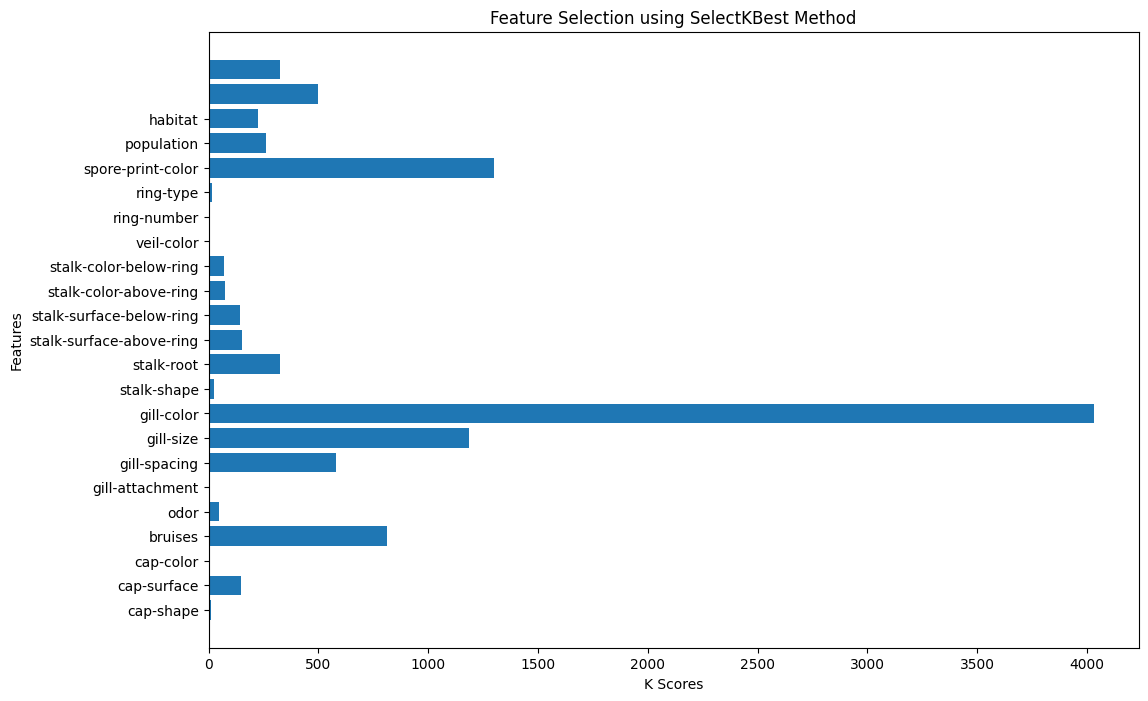

In [37]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize=(12, 8))
plt.barh([i for i in range(len(fs.scores_))], fs.scores_)
plt.ylabel('Features')
plt.xlabel('K Scores')
plt.yticks(ticks=range(0,21), labels=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
            'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
            'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 
            'population', 'habitat'])
plt.title('Feature Selection using SelectKBest Method')
plt.show()

as per the above feature selection by the of chi square we see that some columns have not that much impact on target vrible so for better result we can drop them 

In [38]:
X_train.columns
X_train_new = X_train.drop(['cap-shape', 'cap-color', 'odor', 'gill-attachment', 'stalk-shape', 
                           'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
                           'ring-number','stalk-root_na'], axis=1)


In [39]:
X_train_new.shape

(5686, 13)

In [40]:
X_train.shape
# so we drop 9 column which have no impact on our target variable 

(5686, 23)

In [41]:
# drop unnecessary columns from test data also
X_test_new = X_test.drop(['cap-shape', 'cap-color', 'odor', 'gill-attachment', 'stalk-shape', 
                           'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
                           'ring-number','stalk-root_na'], axis=1)

In [42]:
X_test.shape

(2438, 23)

In [43]:
from sklearn.preprocessing  import StandardScaler
stdscaler = StandardScaler()

In [44]:
# applying transformation on train data
X_train_scaled = pd.DataFrame(stdscaler.fit_transform(X_train_new),columns=X_train_new.columns)

In [53]:
X_train_scaled.head()


,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,veil-type,ring-type,spore-print-color,population,habitat
0,0.133241,-0.848778,-0.441349,1.512186,-1.362370,1.509061,0.689413,0.583996,0.0,-1.267662,1.444736,0.288624,-0.873764
1,-1.494270,-0.848778,2.265781,-0.661294,0.627394,1.509061,0.689413,-2.355889,0.0,-1.267662,-0.241729,-0.505721,-0.287958
2,0.133241,-0.848778,2.265781,-0.661294,-0.509614,1.509061,-2.491117,-2.355889,0.0,-1.267662,-0.663345,-2.888756,-0.287958
3,0.946996,-0.848778,-0.441349,1.512186,-1.362370,0.425388,-0.900852,-0.885946,0.0,-1.267662,1.444736,0.288624,-0.873764
4,-1.494270,-0.848778,2.265781,-0.661294,1.480150,-0.658284,0.689413,0.583996,0.0,0.949309,1.444736,-1.300066,-0.287958


In [ ]:
X_train_scaled

In [73]:
X_test_scaled = pd.DataFrame(stdscaler.transform(X_test_new),columns=X_test_new.columns)


In [74]:
X_test_scaled.head()

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,veil-type,ring-type,spore-print-color,population,habitat,stalk-root_na
0,0.133241,-0.848778,2.265781,-0.661294,1.480150,1.364287,-0.900852,-0.885946,0.0,0.949309,1.444736,-1.300066,-0.287958,-0.660860
1,0.946996,-0.848778,-0.441349,-0.661294,0.627394,-0.938277,-0.900852,-0.885946,0.0,-0.159177,-1.084961,1.082969,-0.873764,-0.660860
2,0.946996,1.178165,-0.441349,1.512186,-0.225362,0.213005,0.689413,0.583996,0.0,0.949309,-0.663345,0.288624,-0.287958,1.491905
3,0.946996,1.178165,-0.441349,-0.661294,-0.793866,-0.938277,0.689413,0.583996,0.0,0.949309,0.601504,0.288624,-0.287958,-0.660860
4,0.946996,-0.848778,-0.441349,1.512186,-1.362370,1.364287,0.689413,-0.885946,0.0,-1.267662,1.444736,0.288624,-0.873764,2.568287


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()
rfc = RandomForestClassifier()

In [47]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

In [48]:
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')

In [49]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [51]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Score:  1.0


In [52]:
xgb_predictions = xgb.predict(X_test)
rf_predictions = rfc.predict(X_test)



NotFittedError: need to call fit or load_model beforehand

In [ ]:
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)


In [95]:
print("XGBoost Accuracy:", xgb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


XGBoost Accuracy: 1.0
Random Forest Accuracy: 1.0


In [96]:
import joblib


In [98]:
joblib.dump(xgb, 'xgb_model.pkl')




['xgb_model.pkl']

In [99]:
joblib.dump(rfc, 'rf_model.pkl')


['rf_model.pkl']

In [100]:
loaded_xgb_model = joblib.load('xgb_model.pkl')
loaded_rf_model = joblib.load('rf_model.pkl')


In [101]:
import os

current_directory = os.getcwd()
print("Current working directory:", current_directory)


Current working directory: C:\Users\SHIVAM


In [102]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Assume you have your features X and labels y ready

# Initialize Random Forest classifier
rf_model = RandomForestClassifier()

# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Set the number of folds for cross-validation
k = 5

# Perform k-fold cross-validation for Random Forest
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=kfold)
print("Random Forest Cross-validation Scores:", rf_cv_scores)
print("Random Forest Mean CV Score:", rf_cv_scores.mean())

# Perform k-fold cross-validation for XGBoost
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=kfold)
print("XGBoost Cross-validation Scores:", xgb_cv_scores)
print("XGBoost Mean CV Score:", xgb_cv_scores.mean())


Random Forest Cross-validation Scores: [1. 1. 1. 1. 1.]
Random Forest Mean CV Score: 1.0
XGBoost Cross-validation Scores: [1. 1. 1. 1. 1.]
XGBoost Mean CV Score: 1.0


In [103]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models on the training set
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Evaluate the models on the test set
rf_accuracy = rf_model.score(X_test, y_test)
xgb_accuracy = xgb_model.score(X_test, y_test)

print("Random Forest Test Accuracy:", rf_accuracy)
print("XGBoost Test Accuracy:", xgb_accuracy)


Random Forest Test Accuracy: 1.0
XGBoost Test Accuracy: 1.0
